In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import uproot4
import pandas as pd


In [3]:
path_to_hists = "E:/run3_sys/" 
dt_file = ['LYAttenuation','LYDown','LYRayleigh','Recomb2','SCE','WireModThetaXZ','WireModThetaYZ_withSigmaSplines','WireModThetaYZ_withoutSigmaSplines','WireModX','WireModYZ','standard']
dt_variaition = ['LYAttenuation','LYDown','LYRayleigh','Recomb2','SCE','WireModThetaXZ','WireModThetaYZ_withSigmaSplines','WireModThetaYZ_withoutSigmaSplines','WireModX','WireModYZ']
pot_exp_R3 = 5e+20
names=locals()

In [4]:
for var in dt_file:
    file_name=str(var)+"_run3.root"
    print("Opening file: ", file_name)
    file = uproot4.open(path_to_hists+file_name)
    tree = file["singlephotonana;1/vertex_tree;1"]
    pot= file["singlephotonana;1/pot_tree;1"]

    shwr_max_energy = tree['reco_shower_energy_max'].array(library='ak')
    shower_number = tree['reco_asso_showers'].array(library="ak")
    track_number = tree['reco_asso_tracks'].array(library='ak')
    pot_number = pot['POT'].array(library='ak')
    shwer_NC_CC_check_std = tree['mctruth_cc_or_nc'].array(library='ak')
    shwer_pi0_check_std = tree['mctruth_num_exiting_pi0'].array(library='ak')

    
    names['POT_' + str(var)] = np.sum(pot_number)
    names['weigh' + str(var)] = pot_exp_R3 / np.sum(pot_number)
    print('POT of ', str(var), '=', names['POT_' + str(var)])


    shower_energy = []
    shower_energy_cut = []

    index=0
    for i,j in zip(shower_number,track_number):
        if(i == 1 and j == 0):
            energy = shwr_max_energy[index][0]
            shower_energy_cut.append(energy)
        index+=1


    for k in shwr_max_energy:
        for energy in k:
            shower_energy.append(energy)

    names['shower_energy_' + str(var)] = np.array(shower_energy)/1000
    names['shower_energy_cut_' + str(var)] = np.array(shower_energy_cut)/1000


   

Opening file:  LYAttenuation_run3.root
POT of  LYAttenuation = 3.579383697397116e+20
Opening file:  LYDown_run3.root
POT of  LYDown = 3.618351032546715e+20
Opening file:  LYRayleigh_run3.root
POT of  LYRayleigh = 3.67379338146183e+20
Opening file:  Recomb2_run3.root
POT of  Recomb2 = 3.572355268771102e+20
Opening file:  SCE_run3.root
POT of  SCE = 3.467959228037992e+20
Opening file:  WireModThetaXZ_run3.root
POT of  WireModThetaXZ = 3.5060210543874245e+20
Opening file:  WireModThetaYZ_withSigmaSplines_run3.root
POT of  WireModThetaYZ_withSigmaSplines = 3.584821015037005e+20
Opening file:  WireModThetaYZ_withoutSigmaSplines_run3.root
POT of  WireModThetaYZ_withoutSigmaSplines = 3.6806181947082074e+20
Opening file:  WireModX_run3.root
POT of  WireModX = 3.6480704912297755e+20
Opening file:  WireModYZ_run3.root
POT of  WireModYZ = 3.580820708134717e+20
Opening file:  standard_run3.root
POT of  standard = 2.714856819704228e+20


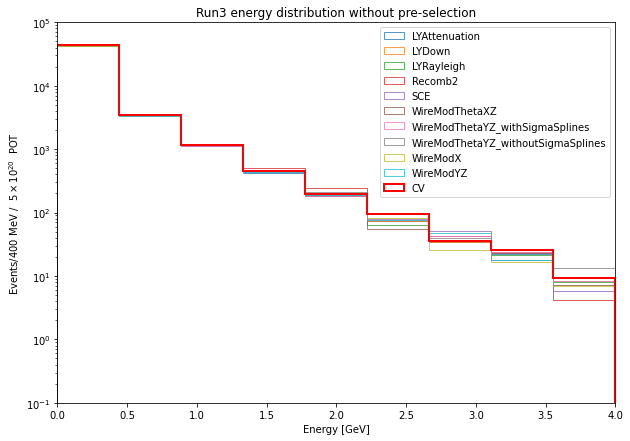

In [8]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/400 MeV /  $5 \times 10^{20}$  POT')
plt.xlim(0.,4.)
plt.ylim(0.1,100000.)
plt.title('Run3 energy distribution without pre-selection')
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,10))
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,10))
    plt.hist(bins[:-1], bins, weights= names['weigh' + str(var)] * counts ,alpha=0.75, histtype='step',label=str(var))
plt.hist(bins_std[:-1], bins_std , weights= names['weigh' + 'standard'] * counts_std,histtype='step',lw=2,label='CV',color='r')
plt.legend()
plt.show()

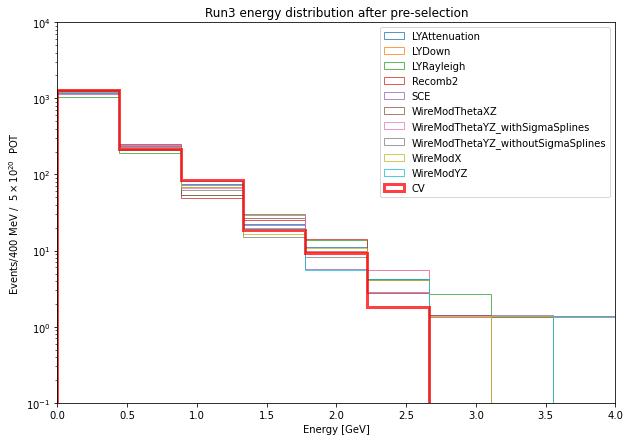

In [11]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/400 MeV /  $5 \times 10^{20}$  POT')
plt.xlim(0.,4.)
plt.ylim(0.1,10000.)
plt.title('Run3 energy distribution after pre-selection')
(counts_std_cut1, bins_std_cut1) = np.histogram(names['shower_energy_cut_' + 'standard'], bins=np.linspace(0,4,10))
cv = (counts_std_cut1*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut_' + str(var)], bins=np.linspace(0,4,10))
    plt.hist(bins[:-1], bins, weights= names['weigh' + str(var)] * counts ,alpha=0.75, histtype='step',lw=1,label=str(var))
plt.hist(bins_std_cut1[:-1], bins_std_cut1 ,weights= names['weigh' + 'standard'] * counts_std_cut1,alpha=0.75, histtype='step',lw=3,label='CV',color='r')
plt.legend()
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_16092\3528467055.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ra=(cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_16092\3528467055.py:16: RuntimeWarning: invalid value encountered in true_divide
  ra=(cv-vars)/cv


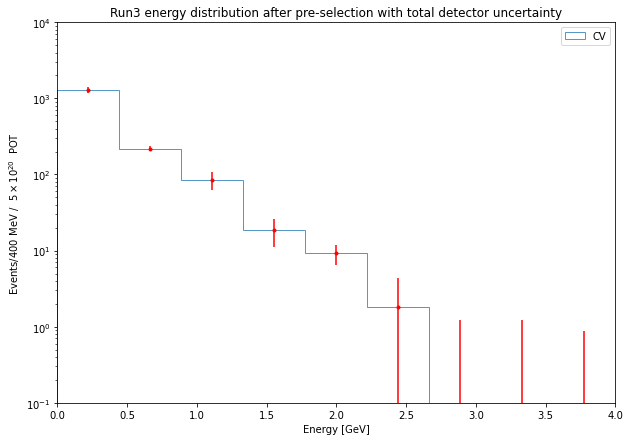

In [15]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/400 MeV /  $5 \times 10^{20}$  POT')
plt.xlim(0.,4)
plt.ylim(0.1,10000.)
plt.title('Run3 energy distribution after pre-selection with total detector uncertainty')
(counts_std, bins_std) = np.histogram(names['shower_energy_cut_' + 'standard'], bins=np.linspace(0,4,10))
cv = (counts_std*names['weigh' + 'standard'])
error = np.zeros(9) 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut_' + str(var)], bins=np.linspace(0,4,10))
    vars=(counts*names['weigh' + str(var)])
    vars=(counts*names['weigh' + str(var)])
    div=np.square(cv-vars)
    ra=(cv-vars)/cv
    #print('uncertainty of ',var,'=',ra)
    error=div+error
err=np.sqrt(error/10)
plt.hist(bins_std[:-1], bins_std, weights=names['weigh' + 'standard'] * counts_std ,alpha=0.75, histtype='step',label='CV')
plt.errorbar(0.5*(bins_std[:-1]+bins_std[1:]), names['weigh' + 'standard'] * counts_std, yerr=err, fmt='r.')
plt.legend()
plt.show()

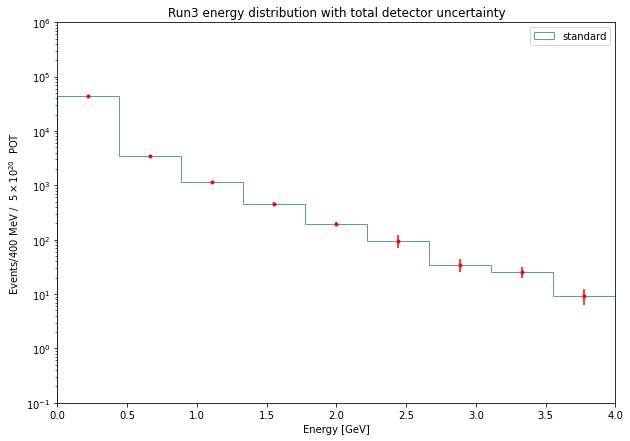

In [13]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/400 MeV /  $5 \times 10^{20}$  POT')
plt.xlim(0.,4.)
plt.ylim(0.1,1000000.)

plt.title('Run3 energy distribution with total detector uncertainty')
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,10))
cv = (counts_std*names['weigh' + 'standard'])
error = np.zeros(9) 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,10))
    vars=(counts*names['weigh' + str(var)])
    div=np.square(cv-vars)
    ra=(cv-vars)/cv
    #print('uncertainty of ',var,'=',ra)
    error=div+error
err=np.sqrt(error/8)
plt.hist(bins_std[:-1], bins_std, weights=names['weigh' + 'standard'] * counts_std ,alpha=0.75, histtype='step',label='cv')
plt.errorbar(0.5*(bins_std[:-1]+bins_std[1:]), names['weigh' + 'standard'] * counts_std, yerr=err, fmt='r.')
plt.legend()
plt.show()

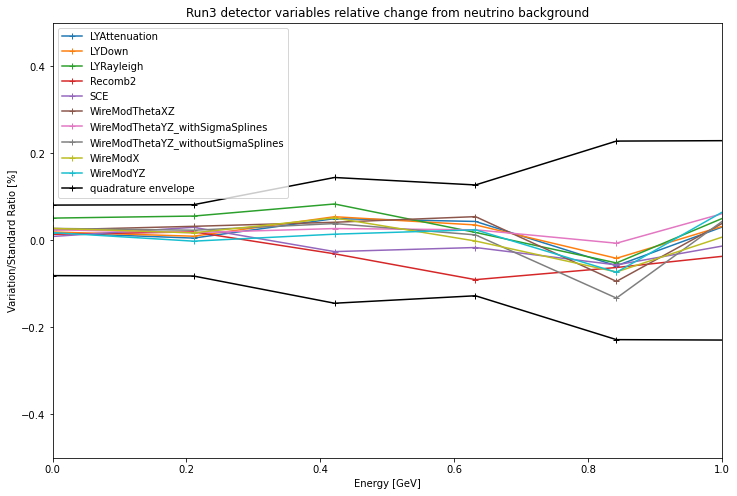

In [21]:
plt.figure(figsize=(12,8))
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Variation/Standard Ratio [%]')
plt.xlim(0.,1.0)
plt.ylim(-0.5,0.5)
plt.title('Run3 detector variables relative change from neutrino background')
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,20))
error = np.zeros(19) 
cv = (counts_std*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,20))
    vars=(counts*names['weigh' + str(var)])
    ratio = (cv-vars)/cv
    ra=np.sqrt(np.sum(np.square(ratio)))
    #print('uncertainty of ',var,'=',ra)
    plt.plot(bins[:-1],ratio,'+-',label=str(var)) 
    error=ratio**2+error
err=np.sqrt(error)
plt.plot(bins[:-1],err,'+-',c='black',label='quadrature envelope') 
plt.plot(bins[:-1],-err,'+-',c='black') 
plt.legend()
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_16092\1740902434.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_16092\1740902434.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_16092\1740902434.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_16092\1740902434.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_16092\1740902434.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_16092\1740902434.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_16092\1740902434.py:13: RuntimeWarning: divide by zero encountere

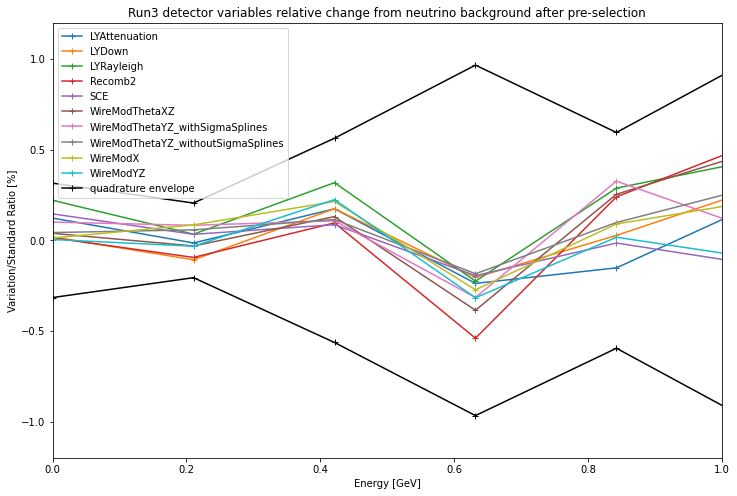

In [22]:
plt.figure(figsize=(12,8))
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Variation/Standard Ratio [%]')
plt.xlim(0.,1.0)
plt.ylim(-1.2,1.2)
plt.title('Run3 detector variables relative change from neutrino background after pre-selection')
(counts_std, bins_std) = np.histogram(names['shower_energy_cut_' + 'standard'], bins=np.linspace(0,4,20))
error = np.zeros(19) 
cv = (counts_std*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut_' + str(var)], bins=np.linspace(0,4,20))
    vars=(counts*names['weigh' + str(var)])
    ratio = (cv-vars)/cv
    ra=np.sqrt(np.sum(np.square(ratio)))
    #print('uncertainty of ',var,'=',ra)
    plt.plot(bins[:-1],ratio,'+-',label=str(var)) 
    error=ratio**2+error
err=np.sqrt(error)
plt.plot(bins[:-1],err,'+-',c='black',label='quadrature envelope') 
plt.plot(bins[:-1],-err,'+-',c='black') 
plt.legend()
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_14204\3930912574.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\3930912574.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\3930912574.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\3930912574.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\3930912574.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\3930912574.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\3930912574.py:13: RuntimeWarning: invalid value encountere

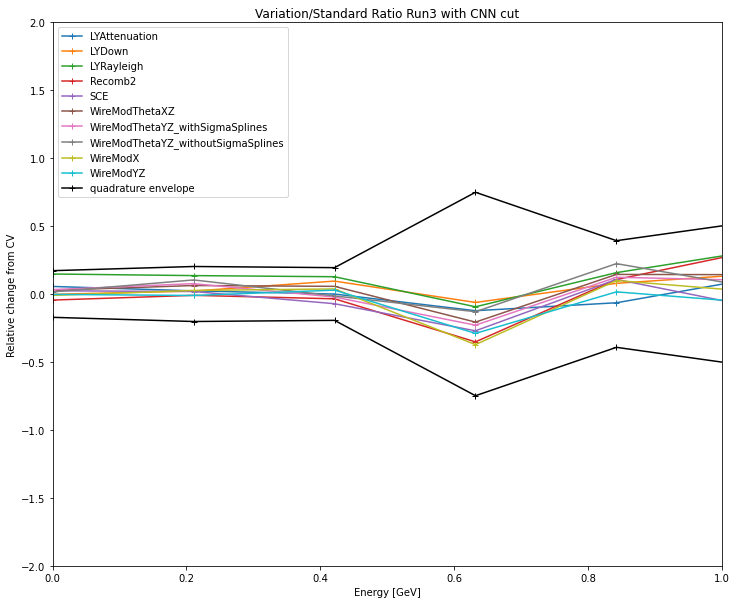

In [ ]:
plt.figure(figsize=(12,10))
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Relative change from CV')
plt.xlim(0.,1.0)
plt.ylim(-2.,2.)
plt.title('Variation/Standard Ratio Run3 with CNN cut')
(counts_std, bins_std) = np.histogram(names['shower_energy_cut2_' + 'standard'], bins=np.linspace(0,4,20))
error = np.zeros(19) 
cv = (counts_std*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut2_' + str(var)], bins=np.linspace(0,4,20))
    vars=(counts*names['weigh' + str(var)])
    ratio = (cv-vars)/cv 
    plt.plot(bins[:-1],ratio,'+-',label=str(var)) 
    error=ratio**2+error
err=np.sqrt(error)
plt.plot(bins[:-1],err,'+-',c='black',label='quadrature envelope') 
plt.plot(bins[:-1],-err,'+-',c='black') 
plt.legend()
plt.show()

uncertainty of  LYAttenuation = 2.862700810780625
uncertainty of  LYDown = 2.811574066711347
uncertainty of  LYRayleigh = 2.747471955592068
uncertainty of  Recomb2 = 3.1142039495390064
uncertainty of  SCE = 2.995789755540128
uncertainty of  WireModThetaXZ = 2.7461455115265148
uncertainty of  WireModThetaYZ_withSigmaSplines = 2.905068535764821
uncertainty of  WireModThetaYZ_withoutSigmaSplines = 3.1585367721546365
uncertainty of  WireModX = 2.6898323243655016
uncertainty of  WireModYZ = 2.9764720563168336


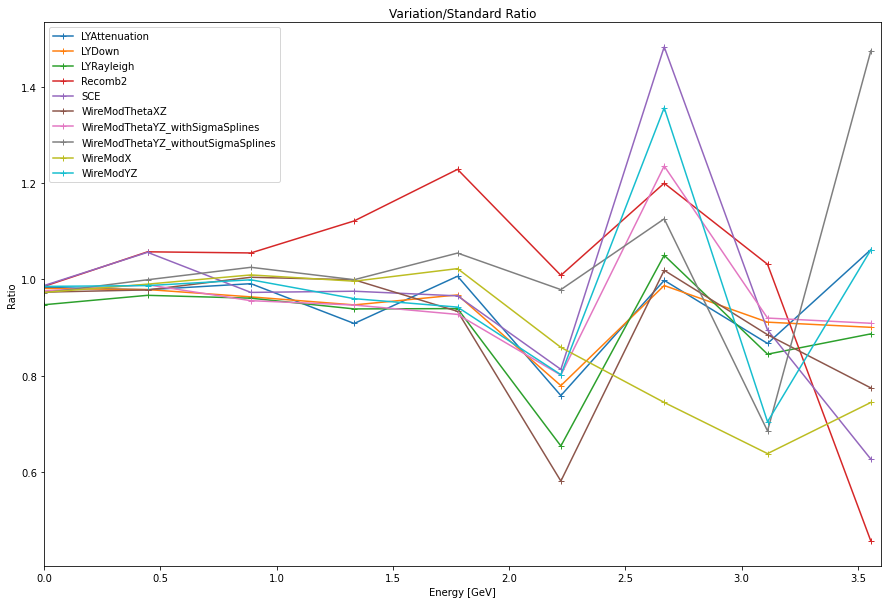

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Ratio')
plt.title('Variation/Standard Ratio')
plt.xlim(0.,3.6)
#plt.ylim(0.,4.)
#plt.title('Variation/Standard Ratio RUN1')
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,10))
error = np.zeros(9) 
cv = (counts_std*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,10))
    ratio = (counts*names['weigh' + str(var)])/cv
    ra=np.sqrt(np.sum(np.square(ratio)))
    print('uncertainty of ',var,'=',ra)
    plt.plot(bins[:-1],ratio,'+-',label=str(var)) 
    error=ratio**2+error
err=np.sqrt(error)
#plt.plot(bins[:-1],err,'+-',c='black',label='quadrature envelope') 
#plt.plot(bins[:-1],-err,'+-',c='black') 
plt.legend()
plt.show()

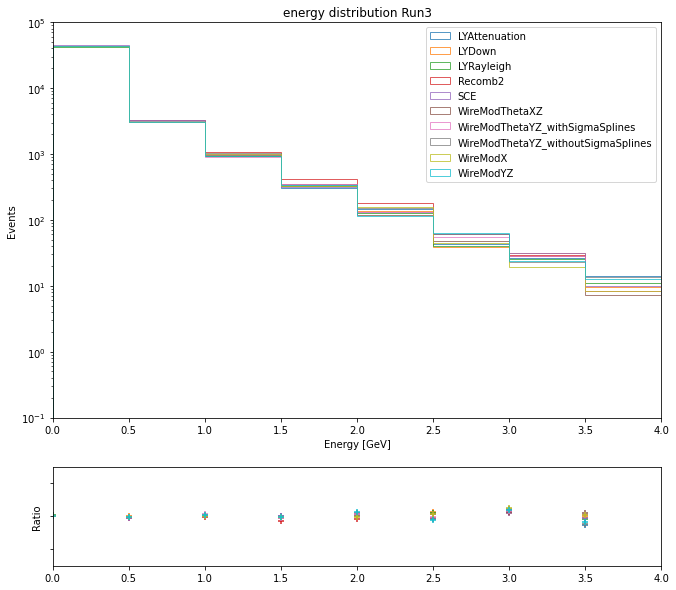

In [ ]:
plt.figure(figsize=(15,10))
grid = plt.GridSpec(4, 4, wspace=0.5, hspace=0.5)
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,9))
cv = (counts_std*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,9))
    main_ax = plt.subplot(grid[0:3,1:4])
    plt.hist(bins[:-1], bins, weights= names['weigh' + str(var)] * counts ,alpha=0.75, histtype='step',label=str(var))
    plt.yscale('log')
    plt.xlabel('Energy [GeV]')
    plt.ylabel(r'Events')
    plt.xlim(0.,4.)
    plt.ylim(0.1,100000.)
    plt.title('energy distribution Run3')
    plt.legend()
    vars=(counts*names['weigh' + str(var)])
    ratio = (cv-vars)/cv
    x_hist = plt.subplot(grid[3,1:4],yticklabels=[],sharex=main_ax)
    plt.ylim(-3,3.)
    plt.ylabel(r'Ratio')
    plt.scatter(bins[:-1], ratio, marker='+')
   
    

 

plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_14204\2389766661.py:17: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\2389766661.py:17: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\2389766661.py:17: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\2389766661.py:17: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\2389766661.py:17: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\2389766661.py:17: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_14204\2389766661.py:17: RuntimeWarning: divide by zero encountere

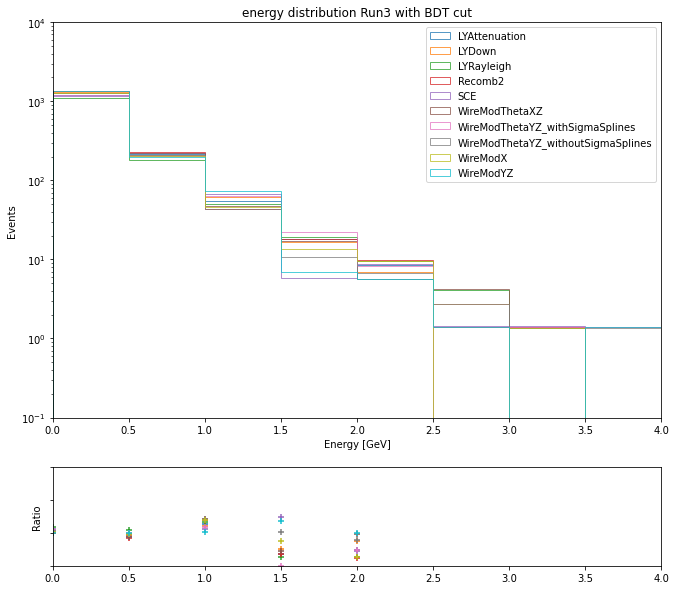

In [ ]:
plt.figure(figsize=(15,10))
grid = plt.GridSpec(4, 4, wspace=0.5, hspace=0.5)
(counts_std, bins_std) = np.histogram(names['shower_energy_cut1_' + 'standard'], bins=np.linspace(0,4,9))
cv = (counts_std*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut1_' + str(var)], bins=np.linspace(0,4,9))
    main_ax = plt.subplot(grid[0:3,1:4])
    plt.hist(bins[:-1], bins, weights= names['weigh' + str(var)] * counts ,alpha=0.75, histtype='step',label=str(var))
    plt.yscale('log')
    plt.xlabel('Energy [GeV]')
    plt.ylabel(r'Events')
    plt.xlim(0.,4.)
    plt.ylim(0.1,10000.)
    plt.title('energy distribution Run3 with BDT cut')
    plt.legend()
    vars=(counts*names['weigh' + str(var)])
    ratio = (cv-vars)/cv
    x_hist = plt.subplot(grid[3,1:4],yticklabels=[],sharex=main_ax)
    plt.ylim(-1,2.)
    plt.ylabel(r'Ratio')
    plt.scatter(bins[:-1], ratio, marker='+')

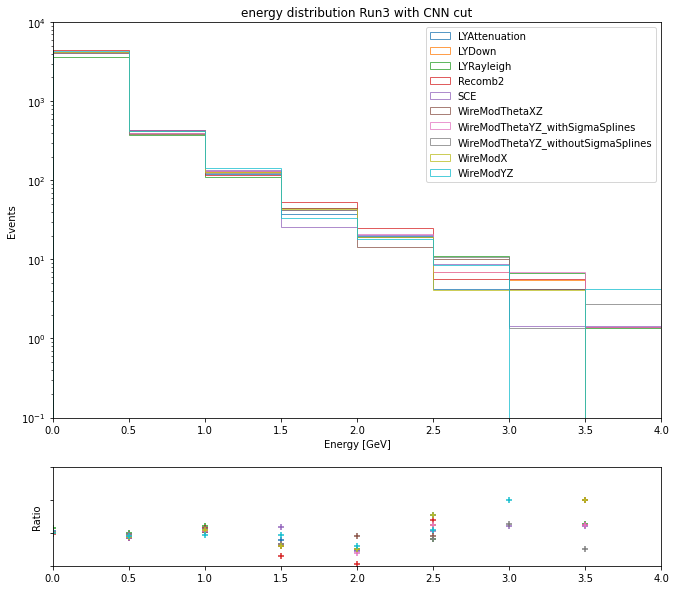

In [ ]:
plt.figure(figsize=(15,10))
grid = plt.GridSpec(4, 4, wspace=0.5, hspace=0.5)
(counts_std, bins_std) = np.histogram(names['shower_energy_cut2_' + 'standard'], bins=np.linspace(0,4,9))
cv = (counts_std*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut2_' + str(var)], bins=np.linspace(0,4,9))
    main_ax = plt.subplot(grid[0:3,1:4])
    plt.hist(bins[:-1], bins, weights= names['weigh' + str(var)] * counts ,alpha=0.75, histtype='step',label=str(var))
    plt.yscale('log')
    plt.xlabel('Energy [GeV]')
    plt.ylabel(r'Events')
    plt.xlim(0.,4.)
    plt.ylim(0.1,10000.)
    plt.title('energy distribution Run3 with CNN cut')
    plt.legend()
    vars=(counts*names['weigh' + str(var)])
    ratio = (cv-vars)/cv
    x_hist = plt.subplot(grid[3,1:4],yticklabels=[],sharex=main_ax)
    plt.ylim(-1,2.)
    plt.ylabel(r'Ratio')
    plt.scatter(bins[:-1], ratio, marker='+')

In [ ]:
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,100))
cv = (counts_std*names['weigh' + 'standard'])
error = [] 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,100))
    vars=(counts*names['weigh' + str(var)])
    m=0
    ratio=[]
    for i,j,k in zip(bins,cv,vars):
        if i < 1.0:
            ra=np.square((j-k)/j)
            m+=1
            ratio.append(ra)
    rat=np.sqrt(np.sum(np.array(ratio)/m)) 
    error.append(rat)
    print('uncertainty of ',var,'=',rat*100)
err=np.sqrt(np.sum(np.square(np.array(error))/10))
print('uncertainty of total =',err*100)



uncertainty of  LYAttenuation = 13.677721628607406
uncertainty of  LYDown = 14.183959958047573
uncertainty of  LYRayleigh = 14.15516682391717
uncertainty of  Recomb2 = 10.811484690895648
uncertainty of  SCE = 14.13478427966576
uncertainty of  WireModThetaXZ = 16.759293616964786
uncertainty of  WireModThetaYZ_withSigmaSplines = 10.145196250508947
uncertainty of  WireModThetaYZ_withoutSigmaSplines = 12.95181575937357
uncertainty of  WireModX = 11.87129354753944
uncertainty of  WireModYZ = 15.372935744131548
uncertainty of total = 13.542957910142963


In [ ]:
(counts_std, bins_std) = np.histogram(names['shower_energy_cut1_' + 'standard'], bins=np.linspace(0,4,100))
cv = (counts_std*names['weigh' + 'standard'])
error = [] 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut1_' + str(var)], bins=np.linspace(0,4,100))
    vars=(counts*names['weigh' + str(var)])
    m=0
    ratio=[]
    for i,j,k in zip(bins,cv,vars):
        if i < 1.0:
            ra=np.square((j-k)/j)
            m+=1
            ratio.append(ra)
    rat=np.sqrt(np.sum(np.array(ratio)/m)) 
    error.append(rat)
    print('uncertainty of ',var,'=',rat*100)
err=np.sqrt(np.sum(np.square(np.array(error))/10))
print('uncertainty of total =',err*100)

uncertainty of  LYAttenuation = 74.39687391825021
uncertainty of  LYDown = 60.619809474739604
uncertainty of  LYRayleigh = 45.47123577586691
uncertainty of  Recomb2 = 76.230608593688
uncertainty of  SCE = 106.18728982091721
uncertainty of  WireModThetaXZ = 94.82437806559749
uncertainty of  WireModThetaYZ_withSigmaSplines = 42.797368761098184
uncertainty of  WireModThetaYZ_withoutSigmaSplines = 37.68408081285622
uncertainty of  WireModX = 46.37665624114384
uncertainty of  WireModYZ = 91.48463460741391
uncertainty of total = 71.50366119793703


In [ ]:
(counts_std, bins_std) = np.histogram(names['shower_energy_cut2_' + 'standard'], bins=np.linspace(0,4,100))
cv = (counts_std*names['weigh' + 'standard'])
error = [] 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut2_' + str(var)], bins=np.linspace(0,4,100))
    vars=(counts*names['weigh' + str(var)])
    m=0
    ratio=[]
    for i,j,k in zip(bins,cv,vars):
        if i < 1.0:
            ra=np.square((j-k)/j)
            m+=1
            ratio.append(ra)
    rat=np.sqrt(np.sum(np.array(ratio)/m)) 
    error.append(rat)
    print('uncertainty of ',var,'=',rat*100)
err=np.sqrt(np.sum(np.square(np.array(error))/10))
print('uncertainty of total =',err*100)

uncertainty of  LYAttenuation = 28.069129808197218
uncertainty of  LYDown = 20.34724874967911
uncertainty of  LYRayleigh = 22.540883898069612
uncertainty of  Recomb2 = 37.26815969055867
uncertainty of  SCE = 38.48851380032032
uncertainty of  WireModThetaXZ = 32.294156833753824
uncertainty of  WireModThetaYZ_withSigmaSplines = 25.923466086258124
uncertainty of  WireModThetaYZ_withoutSigmaSplines = 21.98682723790979
uncertainty of  WireModX = 26.39690447435595
uncertainty of  WireModYZ = 38.748025924281315
uncertainty of total = 29.961349699956163
